# Progetto di Business Intelligence per i Servizi Finanziari

Jupyter Notebook relativo alle parti di codice python utilizzate per il progetto.

## 1. Titoli utilizzati in questo progetto
Sono utilizzati i seguenti titoli:

- Meta Platforms, Inc. (**FB**)
- Alphabet Inc. (**GOOG**)
- Raytheon Technologies Corporation (**RTX**)
- Lockheed Martin Corporation (**LMT**)
- Bank of America Corporation (**BAC**)
- JPMorgan Chase & Co. (**JPM**)

Importiamo ora i titoli direttamente da Yahoo Finance

In [28]:
# Import delle librerie principali utilizzate per il download dei dati e la loro rappresentazione
import pandas as pd
import numpy as np
import yfinance as yf # per effettuare il download diretto da yahoo finance
import matplotlib.pyplot as plt # per il plot dei grafici

# Download dei dati per ogni titolo utilizzato
## titoli tecnologici
fb_df = yf.download('FB', start='2011-11-30', end='2021-11-30')
goog_df = yf.download('GOOG', start='2011-11-30', end='2021-11-30')
## titoli militari
rtx_df = yf.download('RTX', start='2011-11-30', end='2021-11-30')
lmt_df = yf.download('LMT', start='2011-11-30', end='2021-11-30')
## titoli bancari
bac_df = yf.download('BAC', start='2011-11-30', end='2021-11-30')
jpm_df = yf.download('JPM', start='2011-11-30', end='2021-11-30')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Effetuiamo ora la fusione dei dati in un solo DataFrame e visualiziamo i primi 10 dati in tabella

In [33]:
# Creazione del dataframe di pandas
adj_close_tot = pd.DataFrame()

# popolazione del dataframe con i dati presi da yahoo finance
adj_close_tot["Meta Price"] = fb_df[["Adj Close"]] # NOTA: quotata in borsa da 18-05-2012
adj_close_tot["Alphabet Price"] = goog_df[["Adj Close"]]
adj_close_tot["Raytheon Price"] = rtx_df[["Adj Close"]]
adj_close_tot["Lockheed Martin Price"] = lmt_df[["Adj Close"]]
adj_close_tot["Bank of America Price"] = bac_df[["Adj Close"]]
adj_close_tot["JPMorgan Chase Price"] = jpm_df[["Adj Close"]]
adj_close_tot.dropna() # drop dei valori mancanti

adj_close_tot.head(10) # generazione tabella con i primi 10 valori

,Meta Price,Alphabet Price,Raytheon Price,Lockheed Martin Price,Bank of America Price,JPMorgan Chase Price
Date,,,,,,
2012-05-18,38.230000,299.078979,36.082355,60.931610,6.052373,25.427305
2012-05-21,34.029999,305.908386,36.740398,61.557266,5.888562,24.683229
2012-05-22,31.000000,299.278229,36.860043,61.601433,6.017887,25.822113
2012-05-23,32.000000,303.592072,36.919865,61.351143,6.181696,26.011929
2012-05-24,33.029999,300.702881,36.640682,61.365898,6.155832,25.791744
2012-05-25,31.910000,294.660553,36.401409,60.880070,6.164454,25.434896
2012-05-29,28.840000,296.060303,37.433334,61.579334,6.414482,25.533600
2012-05-30,28.190001,293.016693,36.760330,61.683636,6.215916,25.024893
2012-05-31,29.600000,289.345459,36.944771,61.683636,6.345415,25.169157


Visualiziamo i dati nel dataframe qui sopra in un graifo a linee, per visualizzare l'andamento del prezzo negli anni

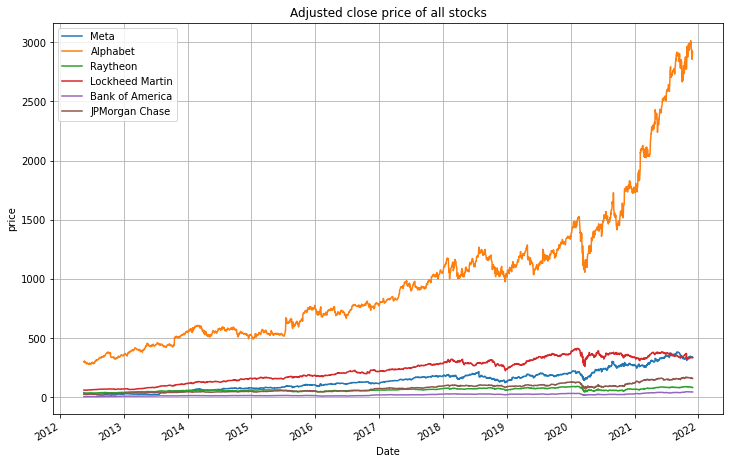

In [38]:
# plot del graifco, specificando i parametri necessari
adj_close_tot["Meta Price"].plot(figsize=(12,8), grid=True, label="Meta")
adj_close_tot["Alphabet Price"].plot(figsize=(12,8), grid=True, label="Alphabet")
adj_close_tot["Raytheon Price"].plot(figsize=(12,8), grid=True, label="Raytheon")
adj_close_tot["Lockheed Martin Price"].plot(figsize=(12,8), grid=True, label="Lockheed Martin")
adj_close_tot["Bank of America Price"].plot(figsize=(12,8), grid=True, label="Bank of America")
adj_close_tot["JPMorgan Chase Price"].plot(figsize=(12,8), grid=True, label="JPMorgan Chase")

plt.legend(loc="upper left") # per mostrare la legenda in alto a sx
plt.title("Adjusted close price of all stocks") # titolo del grafico
plt.ylabel("price") # titolo della asse y (non determinato automaticamente)
plt.show()

## 2. Statistiche descrittive

### 2.1 Settore tecnologico (FB e GOOG)

#### Rendimenti semplici

Tabella dei rendimenti semplici Netti e Lordi

In [4]:
# Raggruppamento dei dati con media
fb_group = fb_df.groupby(pd.Grouper(freq='M')).mean()
goog_group = goog_df.groupby(pd.Grouper(freq='M')).mean()

fb_month_returns = fb_group[['Adj Close']]
goog_month_returns = goog_group[['Adj Close']]
rendimenti_tecno = pd.DataFrame()

# Calcoli dei rendimenti netti e lordi per meta (FB)
rendimenti_netti_fb = np.log(fb_month_returns/fb_month_returns.shift(1))
rendimenti_lordi_fb = np.log(rendimenti_netti_fb + 1)

# Calcoli dei rendimenti netti e lordi per goog
rendimenti_netti_goog = np.log(goog_month_returns/goog_month_returns.shift(1))
rendimenti_lordi_goog = np.log(rendimenti_netti_goog + 1)

rendimenti_tecno["Rendimenti Netti Meta"] = rendimenti_netti_fb
rendimenti_tecno["Rendimenti Lordi Meta"] = rendimenti_lordi_fb
rendimenti_tecno["Rendimenti Netti Alphabet"] = rendimenti_netti_goog
rendimenti_tecno["Rendimenti Lordi Alphabet"] = rendimenti_lordi_goog
rendimenti_tecno = rendimenti_tecno.dropna()

rendimenti_tecno

,Rendimenti Netti Meta,Rendimenti Lordi Meta,Rendimenti Netti Alphabet,Rendimenti Lordi Alphabet
Date,,,,
2012-06-30,-0.075904,-0.078939,-0.059138,-0.060959
2012-07-31,-0.022612,-0.022872,0.043593,0.042669
2012-08-31,-0.362019,-0.449446,0.105718,0.100495
2012-09-30,0.025514,0.025194,0.080848,0.077746
2012-10-31,-0.000406,-0.000406,0.010737,0.010680
...,...,...,...,...
2021-07-31,0.049158,0.047988,0.056498,0.054959
2021-08-31,0.026913,0.026557,0.051407,0.050129
2021-09-30,0.002614,0.002611,0.018219,0.018055


Grafico a Linee dei rendimenti semplici netti

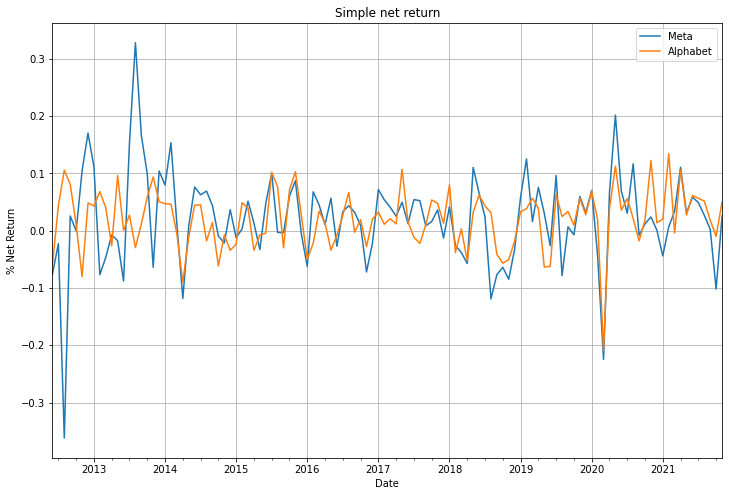

In [68]:
# Plot del grafico con rendimenti netti, utiliziamo plt per indicizzare il grafico
rendimenti_tecno["Rendimenti Netti Meta"].plot(figsize=(12,8), grid=True, label="Meta")
rendimenti_tecno["Rendimenti Netti Alphabet"].plot(figsize=(12,8), grid=True, label="Alphabet")

plt.legend(loc="upper right")
plt.ylabel("% Net Return")
plt.title("Simple net return")
plt.show()

#### Rendimenti composti
Tabella dei rendimenti composti

In [53]:
# Rendimenti composti per Meta (FB)
cumul_daily_return_fb = (1 + rendimenti_netti_fb).cumprod()
rendimenti_tecno["Rendimenti Compositi Meta"] = cumul_daily_return_fb

# Rendimenti composti per Alphabet (GOOG)
cumul_daily_return_goog = (1 + rendimenti_netti_goog).cumprod()
rendimenti_tecno["Rendimenti Compositi Alphabet"] = cumul_daily_return_goog

# Costruzione tabella con titoli colonne
rendimenti_tecno[["Rendimenti Compositi Meta", "Rendimenti Compositi Alphabet"]]

,Rendimenti Compositi Meta,Rendimenti Compositi Alphabet
Date,,
2012-06-30,0.924096,0.960711
2012-07-31,0.903201,1.002591
2012-08-31,0.576225,1.108583
2012-09-30,0.590927,1.198210
2012-10-31,0.590687,1.211075
...,...,...
2021-07-31,7.487620,7.603153
2021-08-31,7.689137,7.994008
2021-09-30,7.709239,8.139652


Grafico dei rendimenti composti

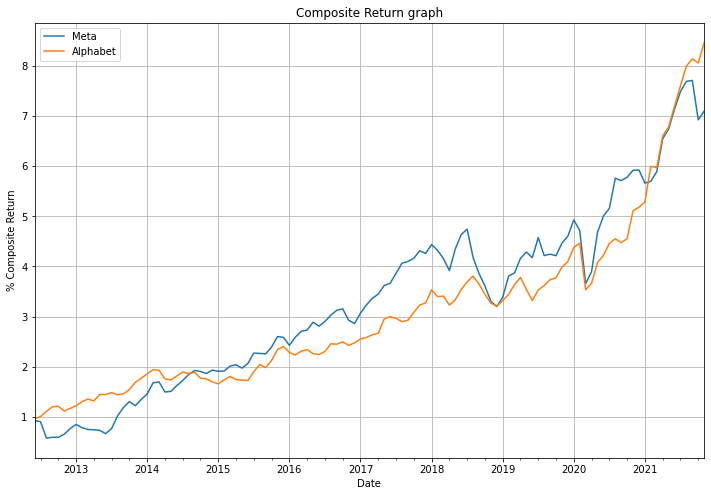

In [59]:
# Plot del grafico dei rendimenti compositi, con i rispettivi titoli
rendimenti_tecno["Rendimenti Compositi Meta"].plot(figsize=(12,8), grid=True, label="Meta")
rendimenti_tecno["Rendimenti Compositi Alphabet"].plot(figsize=(12,8), grid=True, label="Alphabet")

plt.legend(loc="upper left")
plt.ylabel("% Composite Return")
plt.title("Composite Return graph")
plt.show()